In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Loading the database and creating the predictors (independent variables - X) and class (dependent variable - y)
iris = datasets.load_iris()
predictors = iris.data
class_ = iris.target
class_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# Transformation from class to "dummy" format, as we have a neural network with 3 neurons in the output layer
class_dummy = np_utils.to_categorical(class_)
class_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [4]:
# Division of the database between training and testing (30% to test and 70% to train)
x_train, x_test, y_train, y_test = train_test_split(predictors, class_dummy, test_size = 0.3, random_state = 0)

In [5]:
# Creation of the neural network structure with the Sequential class (sequence of layers)
NN_model = Sequential()
# first hidden layer, 5 neurons, 4 incoming neurons
NN_model.add(Dense(units = 5, input_dim = 4))
# second hidden layer
NN_model.add(Dense(units = 4))
# Softmax function because we have a classification problem with more than two classes
# (a probability is generated in each neuron)
NN_model.add(Dense(units = 3, activation = 'softmax'))

In [6]:
# Visualization of the neural network structure
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Configuration of neural network parameters (adam = algorithm to update weights and loss = error calculation)
NN_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
# Training, dividing the training base into one portion for validation (validation_data)
Neural_network = NN_model.fit(x_train, y_train, epochs = 500,
           validation_data = (x_test, y_test))

Epoch 1/500
4/4 [==============================] - 2s 234ms/step - loss: 2.7607 - accuracy: 0.4190 - val_loss: 1.9062 - val_accuracy: 0.4667
Epoch 2/500
4/4 [==============================] - 0s 36ms/step - loss: 2.6530 - accuracy: 0.3714 - val_loss: 1.8489 - val_accuracy: 0.4222
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 2.5413 - accuracy: 0.3429 - val_loss: 1.7815 - val_accuracy: 0.4444
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 2.4388 - accuracy: 0.3619 - val_loss: 1.7180 - val_accuracy: 0.4667
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 2.3518 - accuracy: 0.3810 - val_loss: 1.6591 - val_accuracy: 0.4667
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 2.2602 - accuracy: 0.3810 - val_loss: 1.6039 - val_accuracy: 0.4667
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 2.1723 - accuracy: 0.3714 - val_loss: 1.5510 - val_accuracy: 0.4667
Epoch 8/500
4/4 [==

Text(0, 0.5, 'Accuracy')

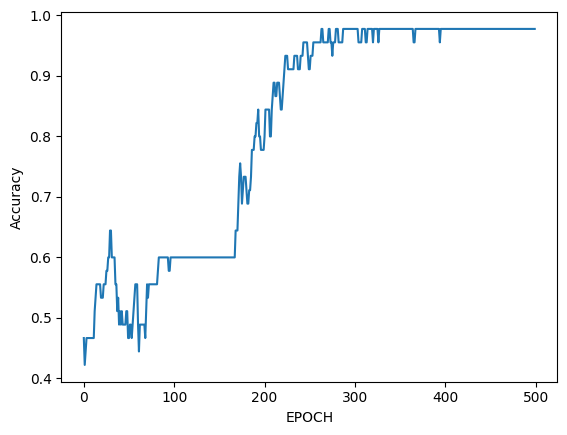

In [9]:
# Plot the accuracy of the training and validation data
Neural_network.history.keys()

plt.plot(Neural_network.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('Accuracy')


In [19]:
# Forecasts and change the variable to True or False according to threshold 0.5
forecast = NN_model.predict(x_test)
forecast = (forecast > 0.5)
forecast

2/2 [==============================] - 0s 3ms/step


array([[False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [20]:
# As it is a problem with three outputs, we need to look for the position that has the highest value (3 values are returned)
y_test_matrix = [np.argmax(t) for t in y_test]
y_forecast_matrix = [np.argmax(t) for t in forecast]

In [21]:
# Generation of the confusion matrix
confusao = confusion_matrix(y_test_matrix, y_forecast_matrix)
print(confusao)
ACC = accuracy_score(y_test_matrix, y_forecast_matrix)
print(f'Accuracy: {ACC*100:.1f} %')

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy: 97.8 %
